## Students Performance in Exams

Dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Check missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
## check for duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
## check categorical values
print('Gender: ', df['gender'].unique())
print('race/ethnicity: ', df['race/ethnicity'].unique())
print('parental level of education: ', df['parental level of education'].unique())
print('lunch: ', df['lunch'].unique())
print('test preparation course: ',df['test preparation course'].unique())

Gender:  ['female' 'male']
race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:  ['standard' 'free/reduced']
test preparation course:  ['none' 'completed']


In [10]:
# separate numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(numerical_features)
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print(categorical_features)                    


['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
## calculating total and average score
df['total score']= df[numerical_features].sum(axis=1)
df['average score'] = df['total score']/3

In [12]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [13]:
# scores insights
df[numerical_features].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Visualization

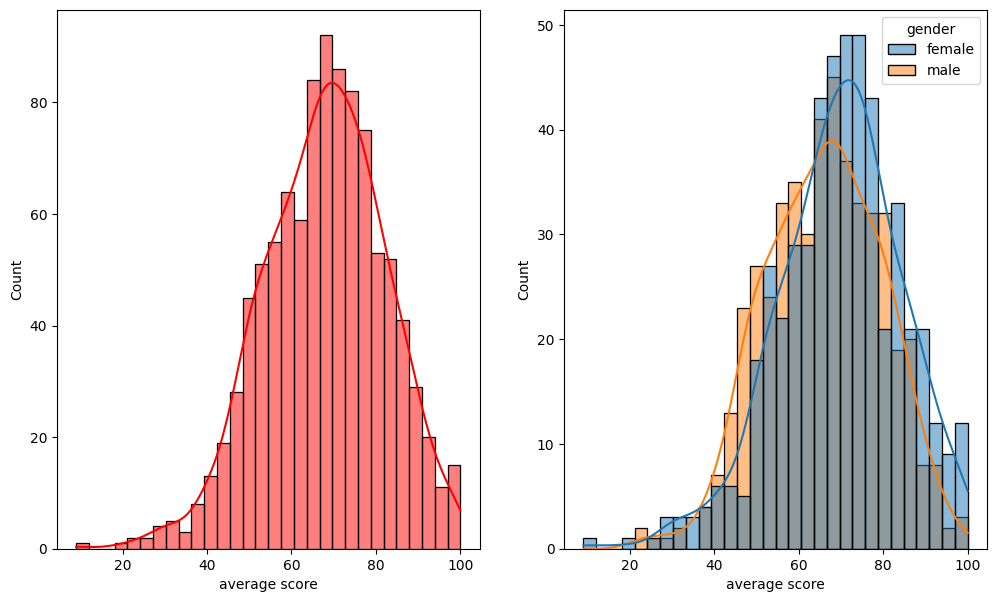

In [19]:
## visaulization
fig, axs= plt.subplots(1, 2, figsize=(12,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='average score', bins=30, kde=True, color='red')
plt.subplot(1,2,2)
sns.histplot(data=df, x='average score', kde=True, bins=30, hue='gender')
plt.show()

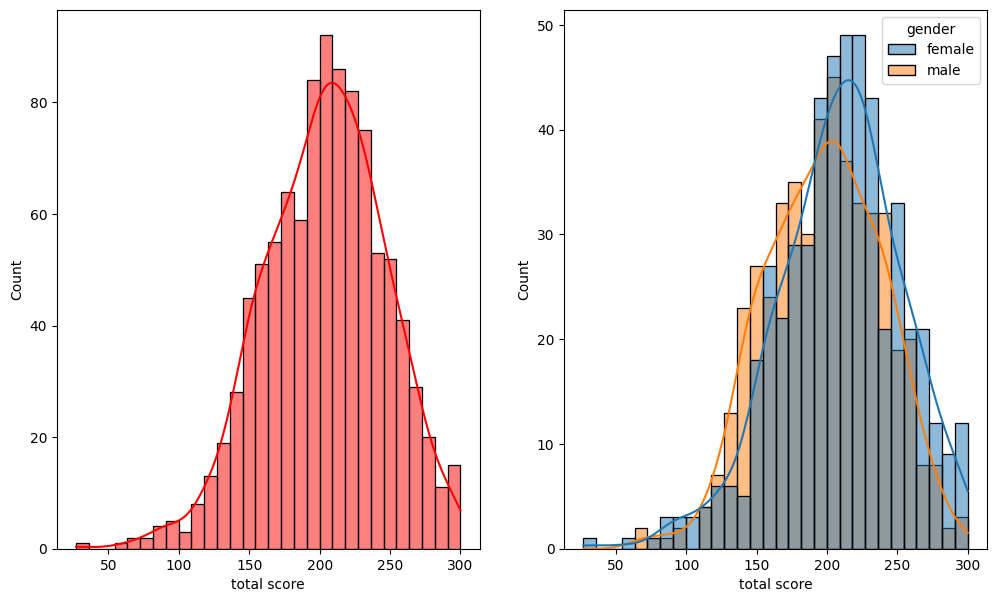

In [20]:
fig, axs= plt.subplots(1, 2, figsize=(12,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='red')
plt.subplot(1,2,2)
sns.histplot(data=df, x='total score', kde=True, bins=30, hue='gender')
plt.show()

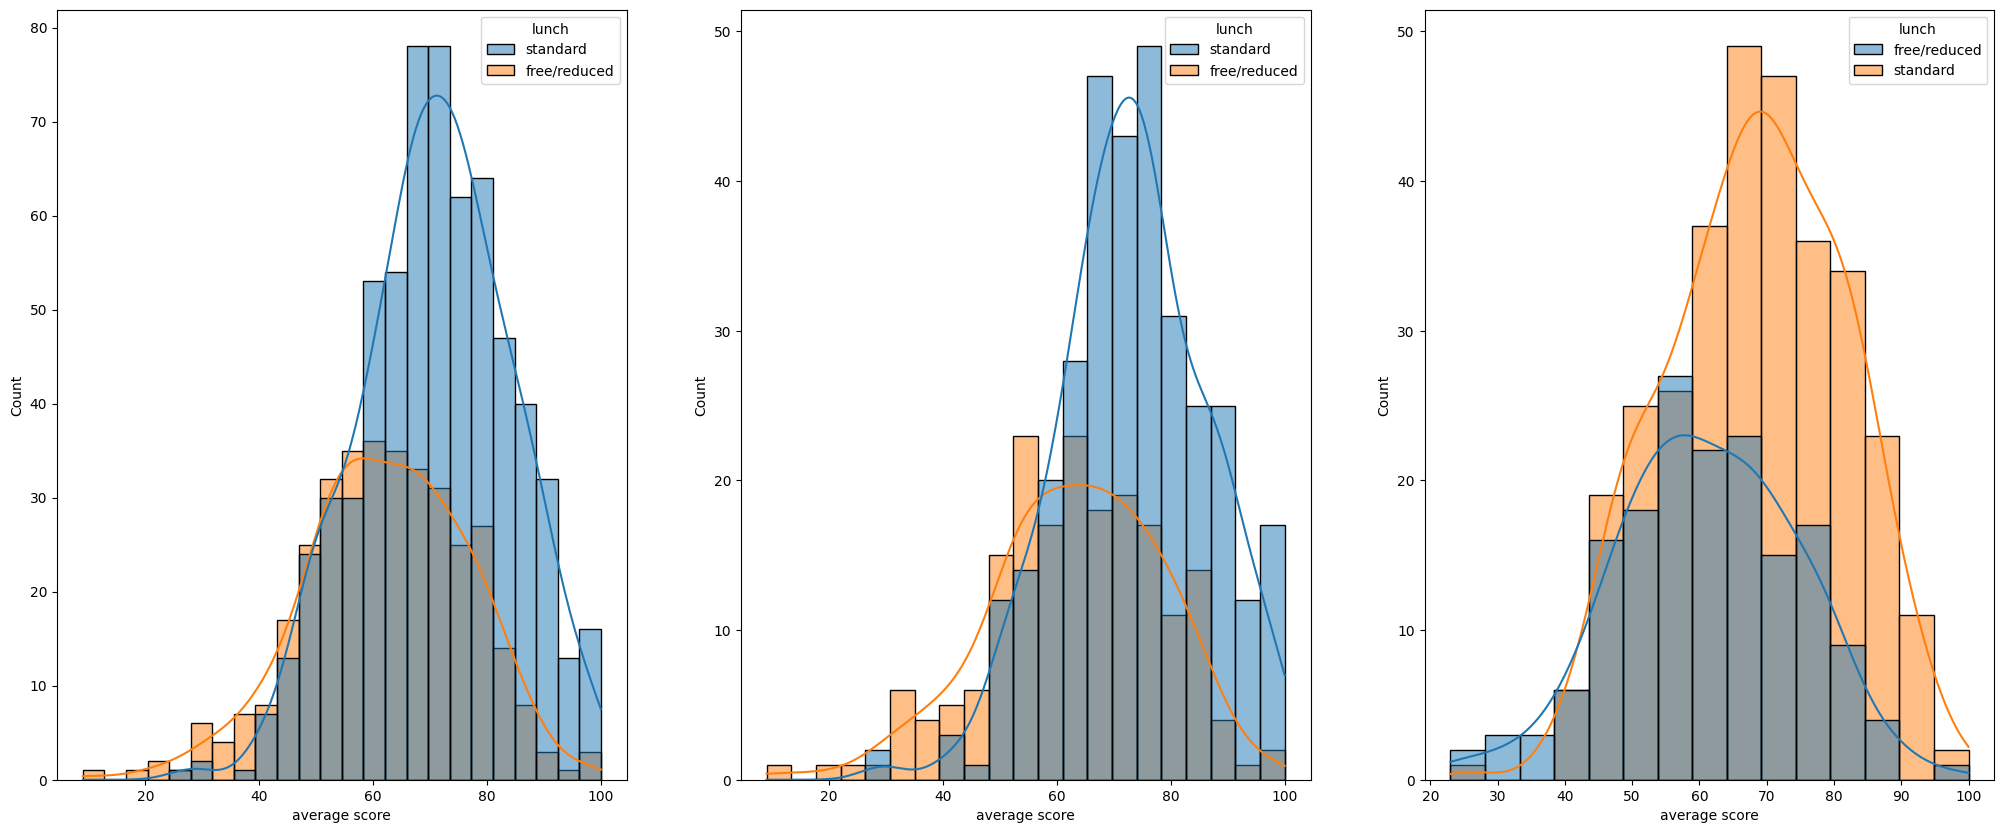

In [28]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

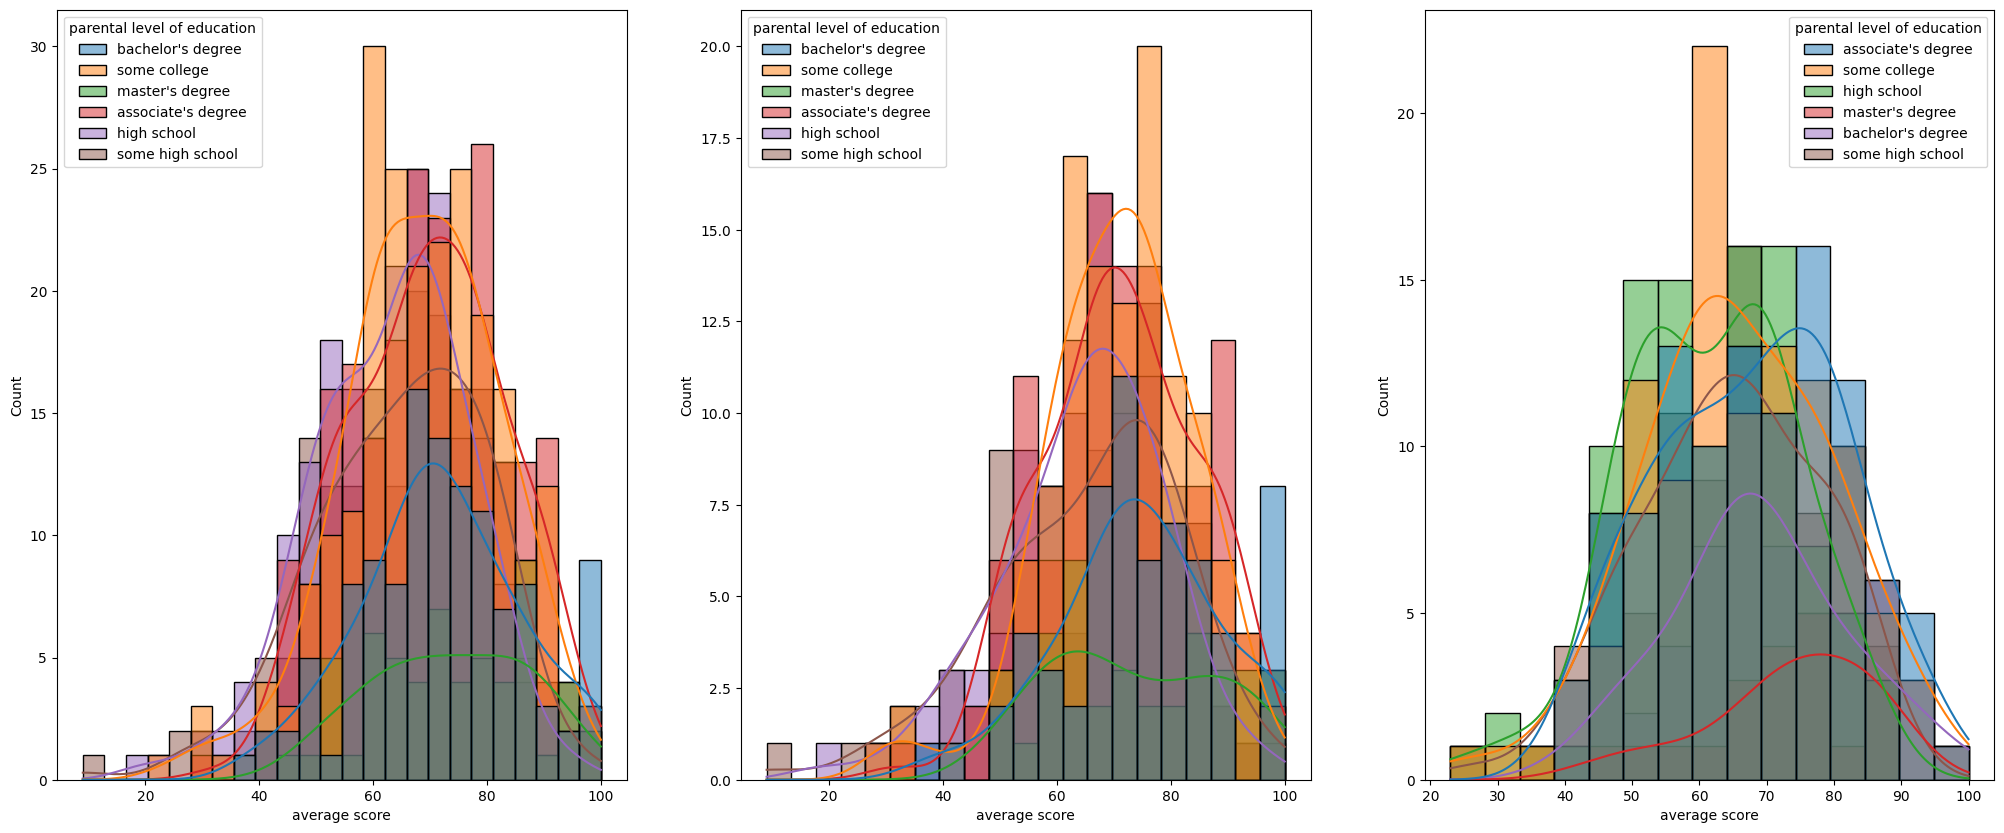

In [29]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.show()

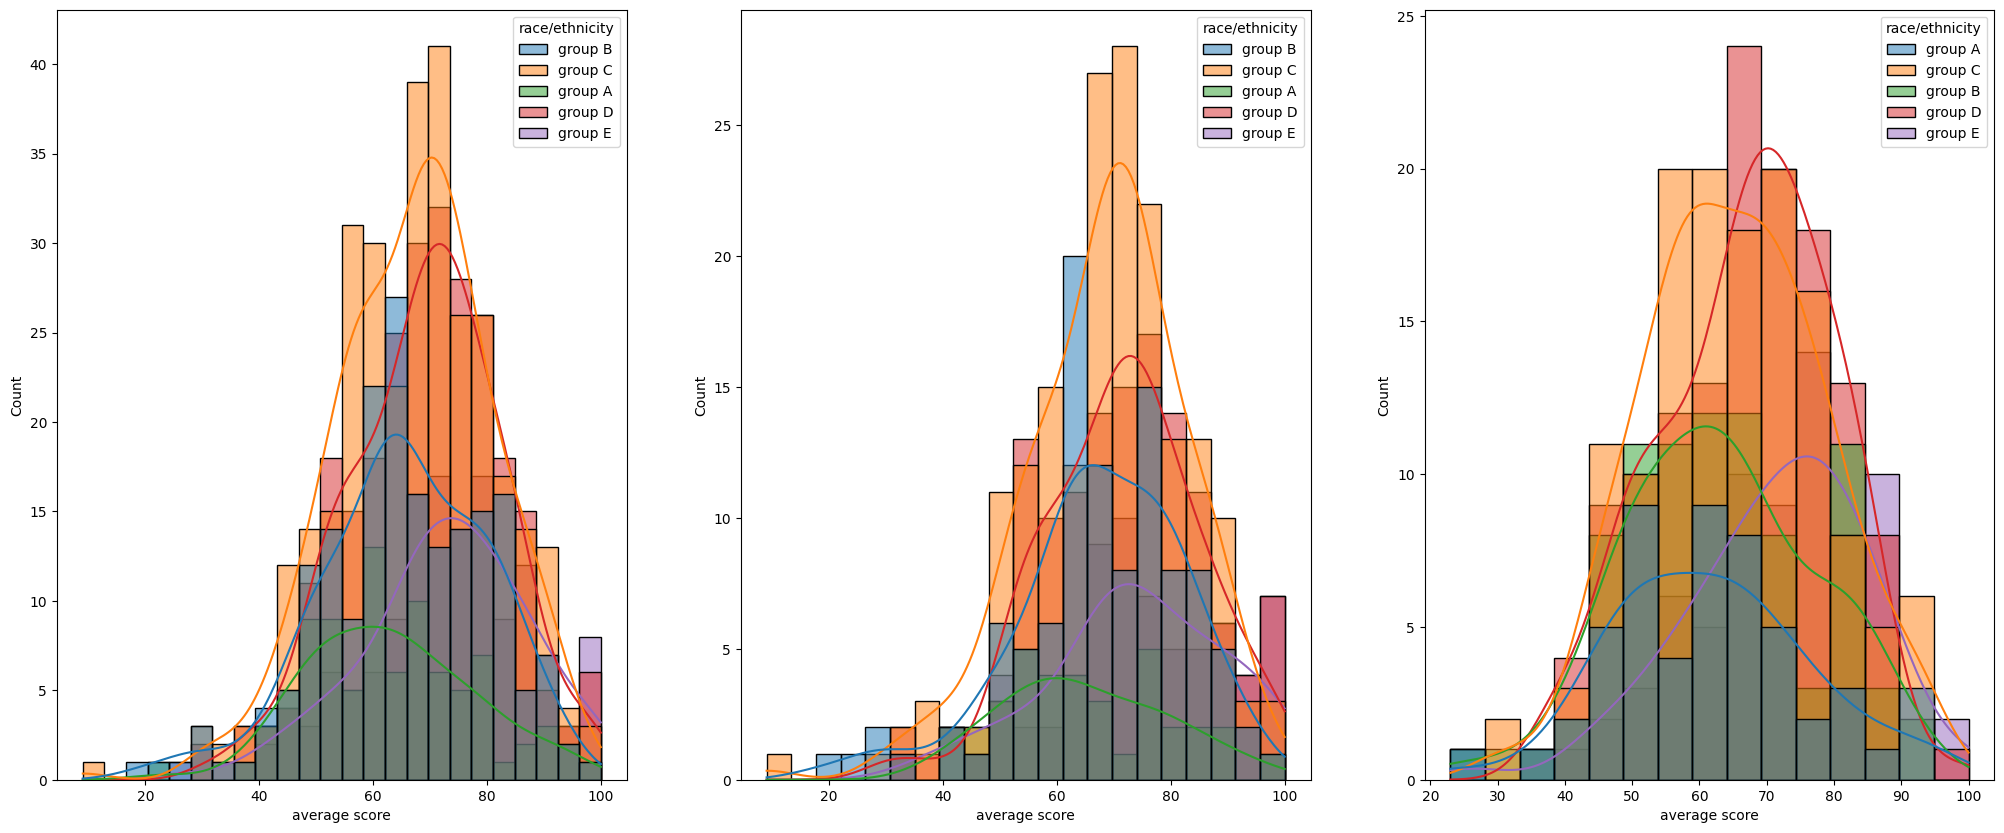

In [30]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()

Scores

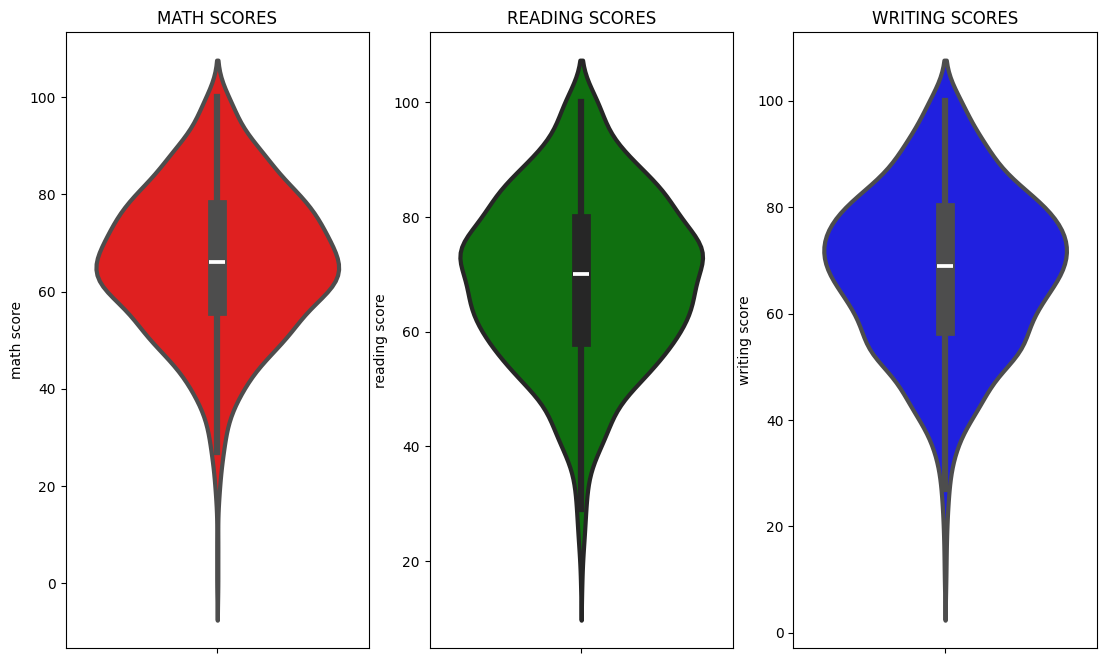

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Multivarite Analysis

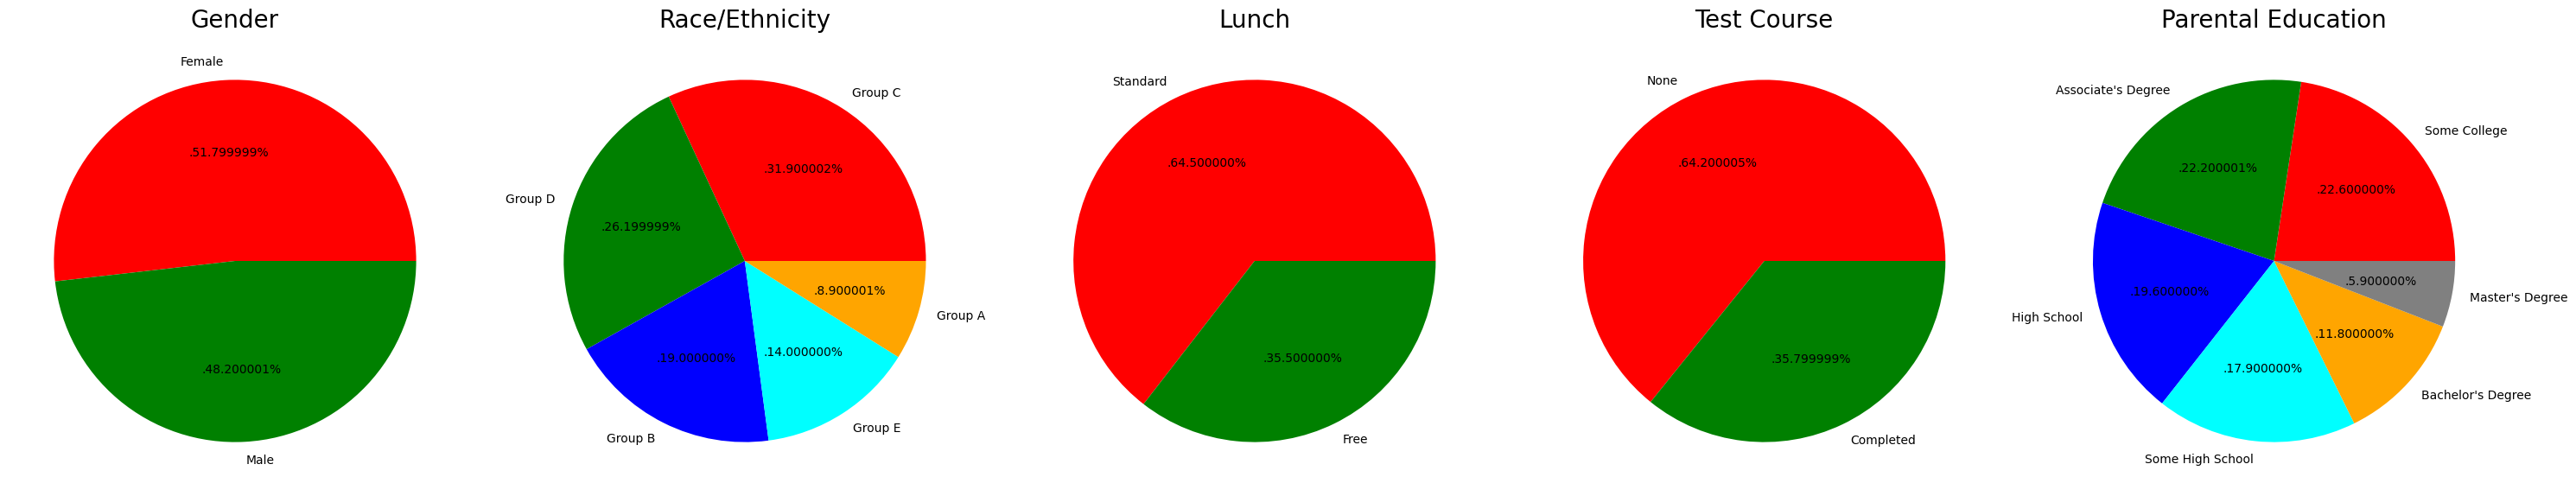

In [32]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Students performance vs Gender

C:\Users\msali\AppData\Local\Temp\ipykernel_22532\1720327845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


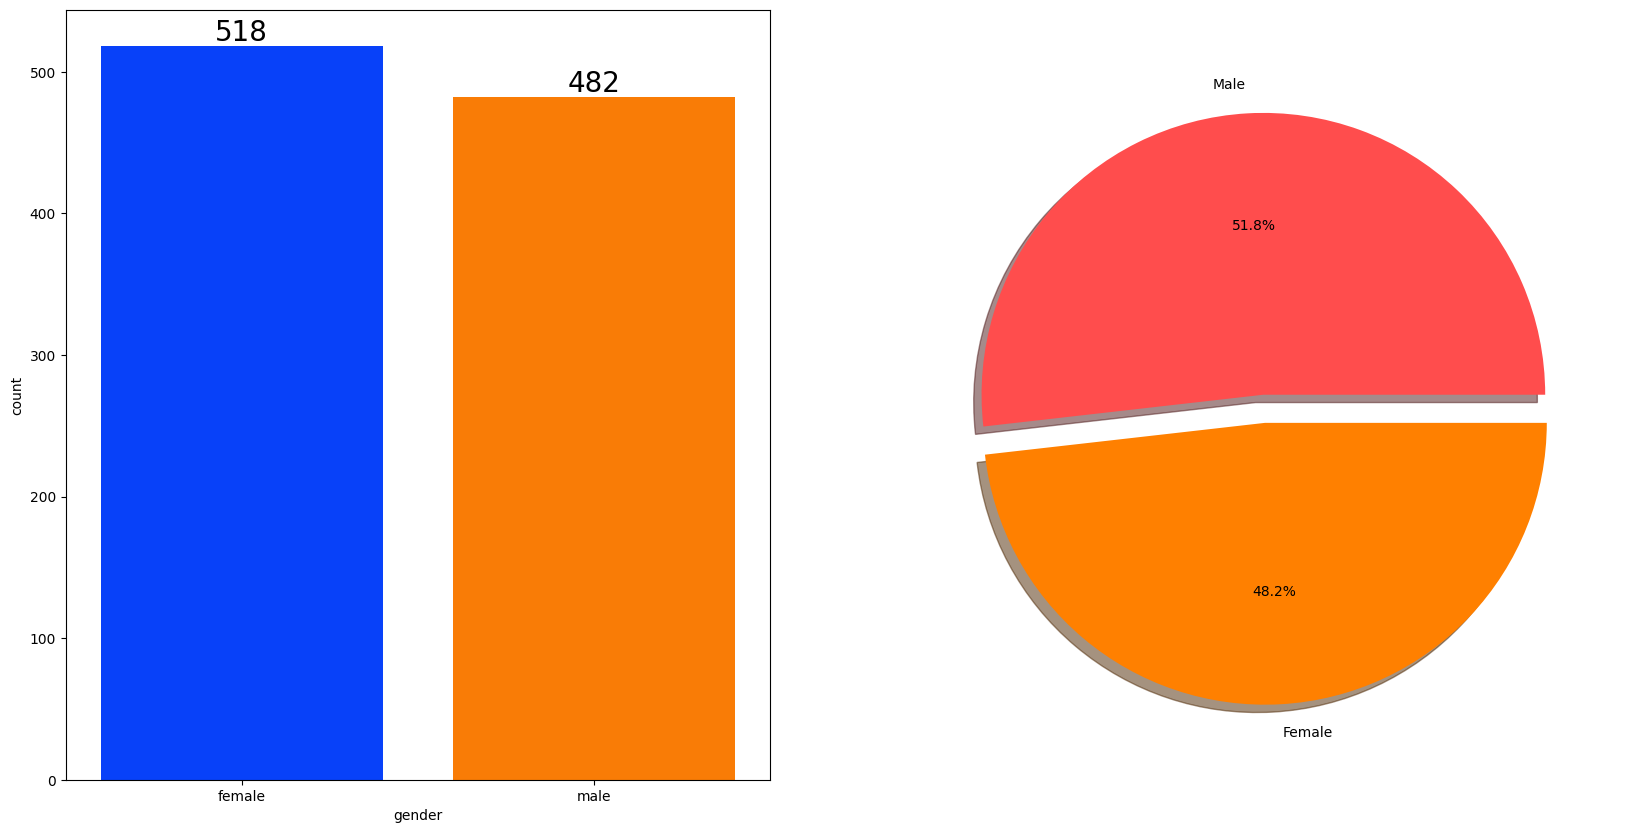

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [35]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


C:\Users\msali\AppData\Local\Temp\ipykernel_22532\4238366375.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
C:\Users\msali\AppData\Local\Temp\ipykernel_22532\4238366375.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['average score'][1], gender_group['math score'][1]]


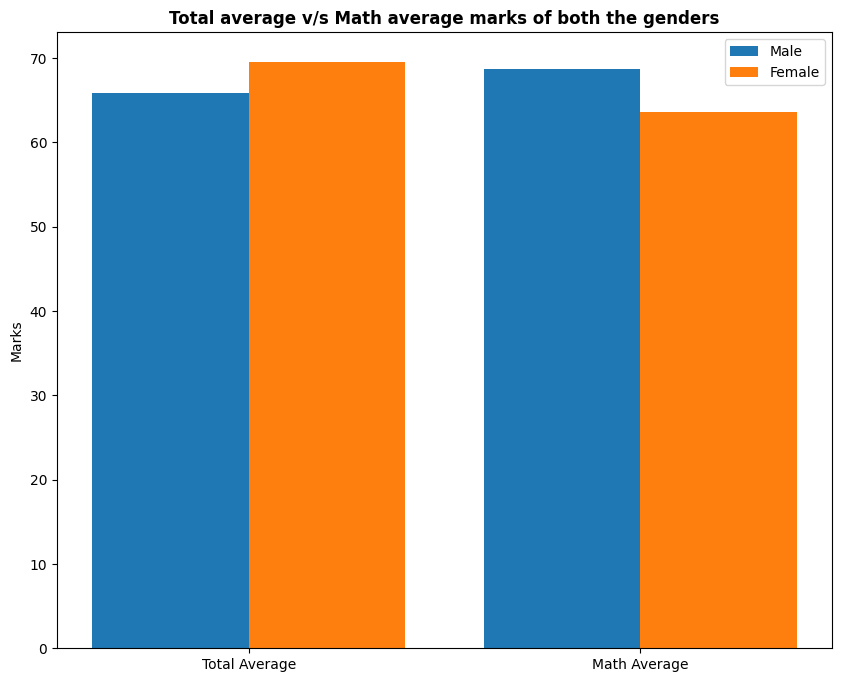

In [37]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Students performance vs Race/Ethnicity

C:\Users\msali\AppData\Local\Temp\ipykernel_22532\659906803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)


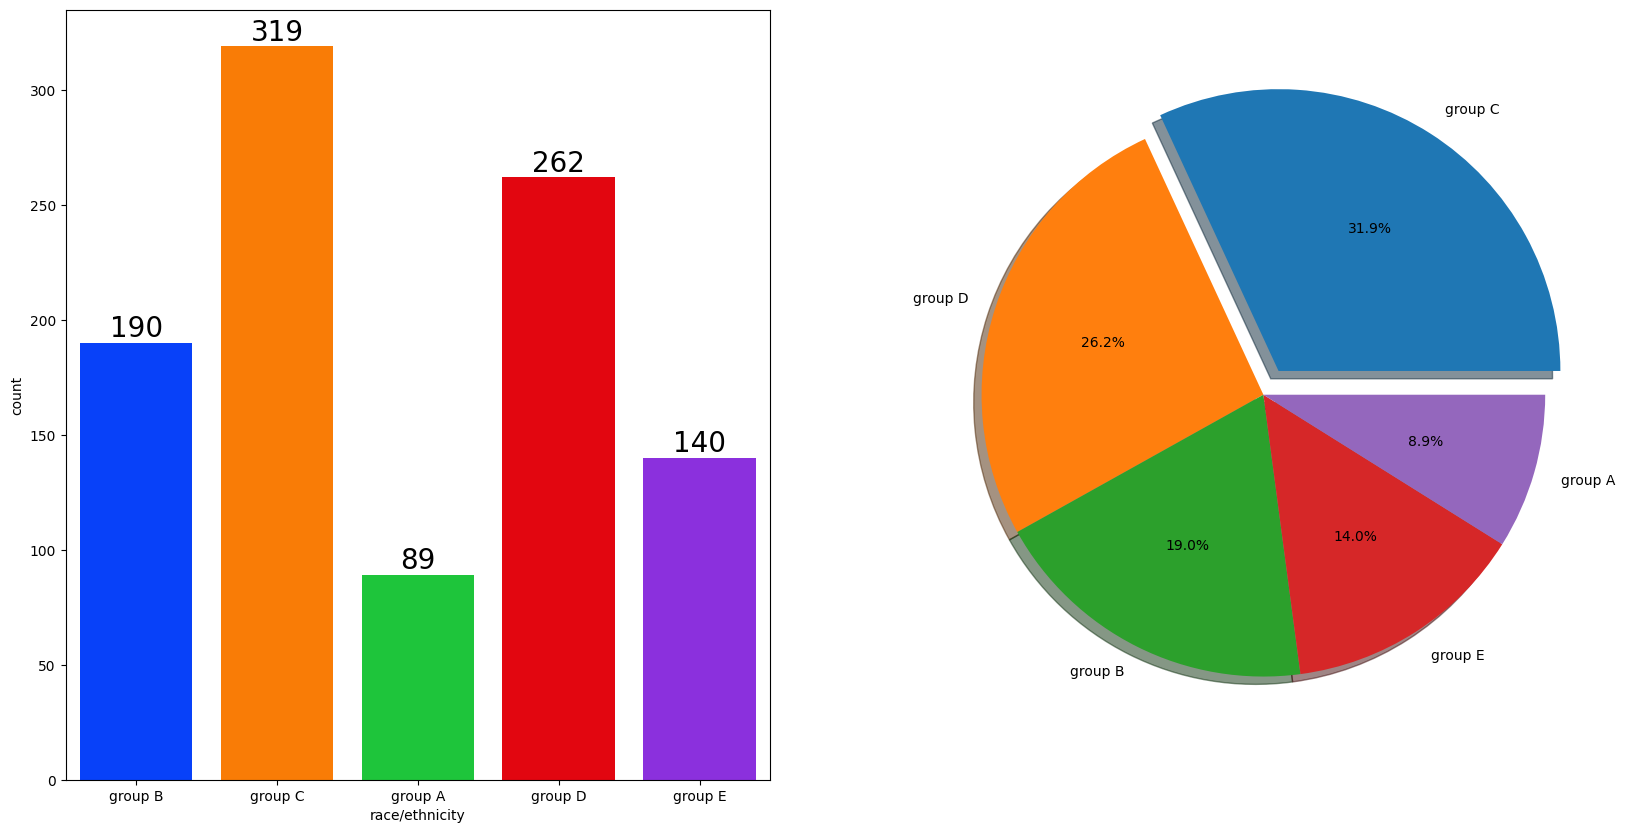

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

C:\Users\msali\AppData\Local\Temp\ipykernel_22532\3979719510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\msali\AppData\Local\Temp\ipykernel_22532\3979719510.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\msali\AppData\Local\Temp\ipykernel_22532\3979719510.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

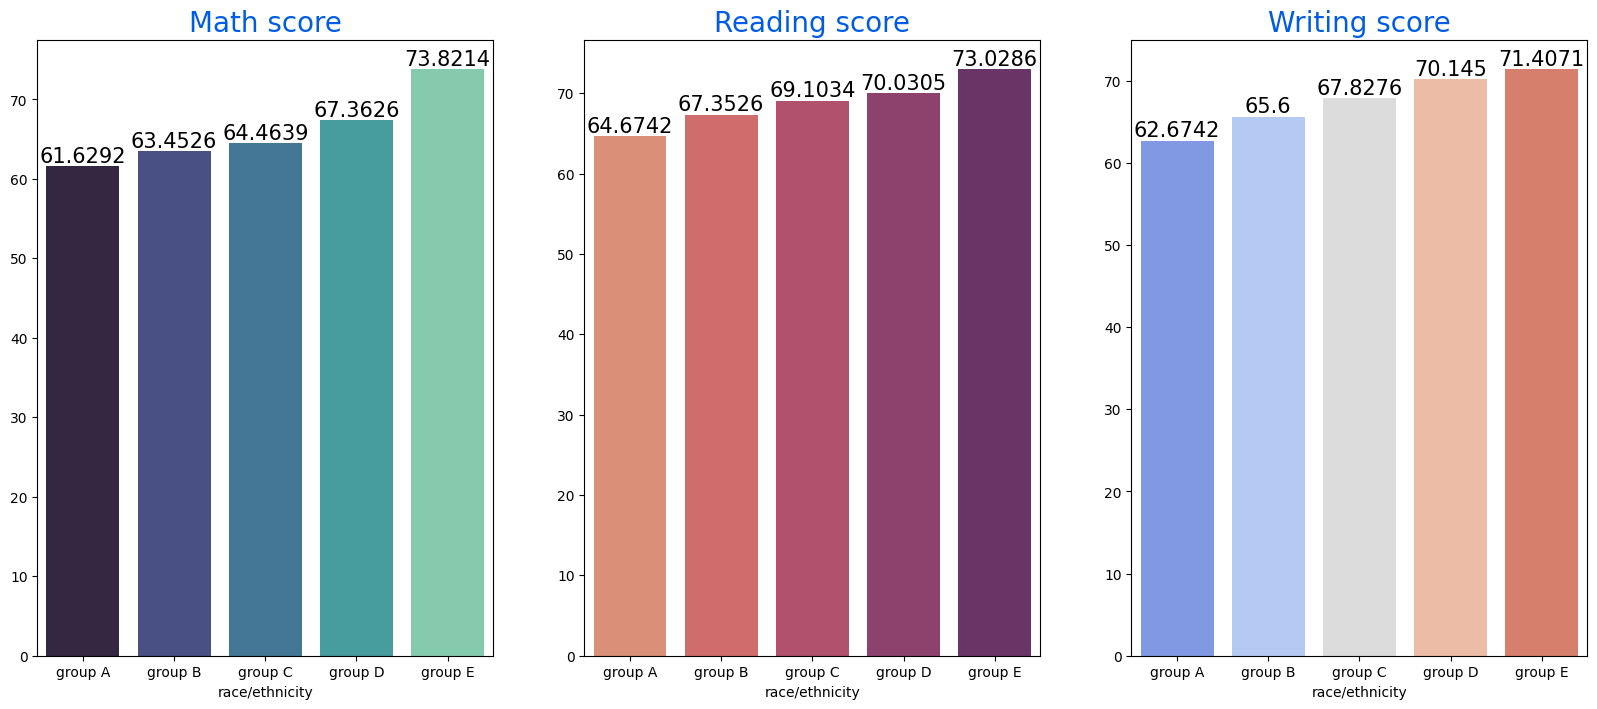

In [39]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Students performance vs Parental level education

C:\Users\msali\AppData\Local\Temp\ipykernel_22532\2764336993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental level of education'], palette = 'Blues')


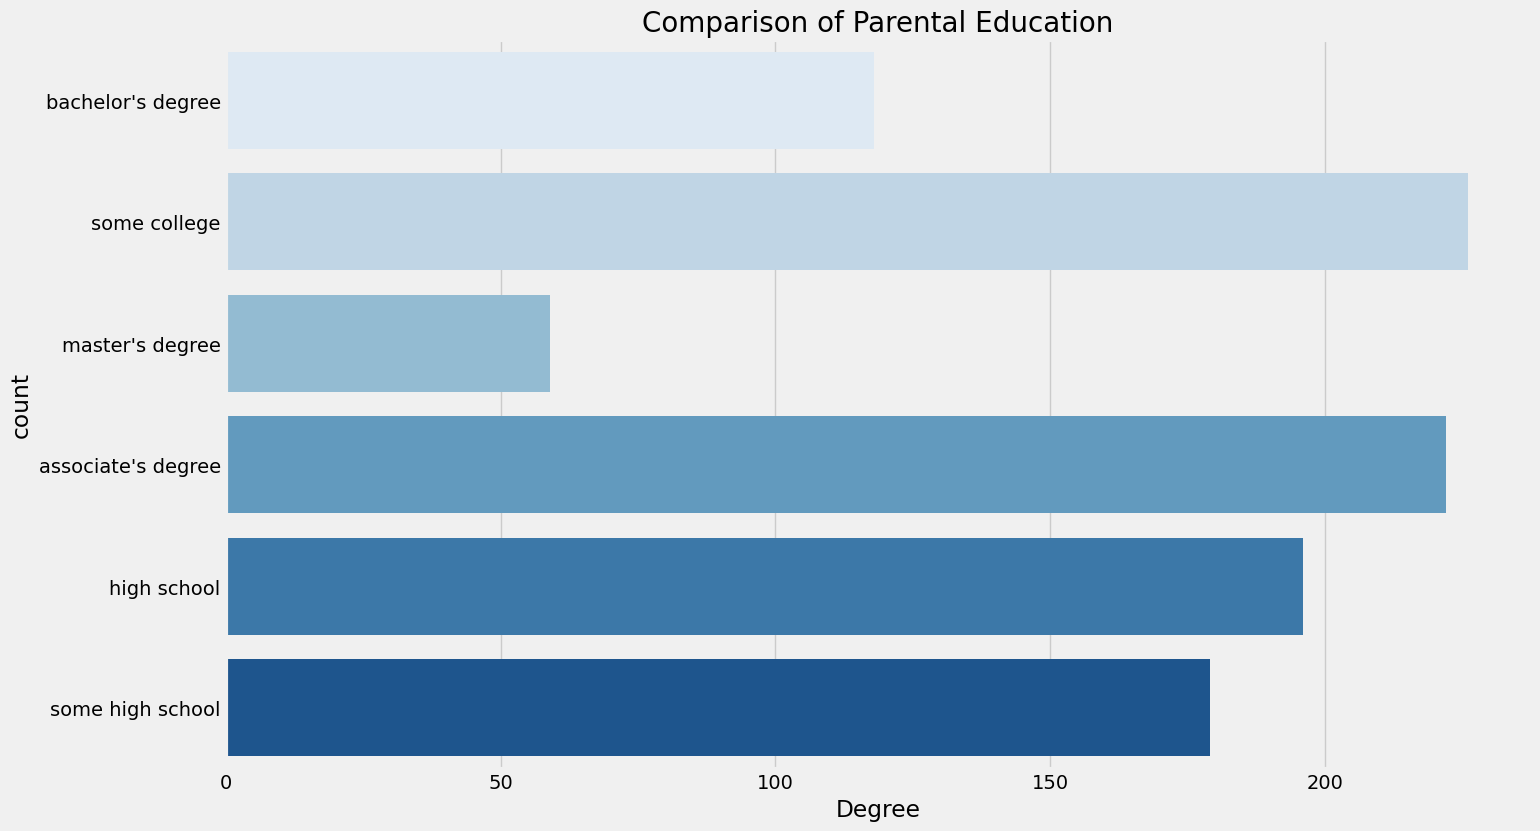

In [40]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

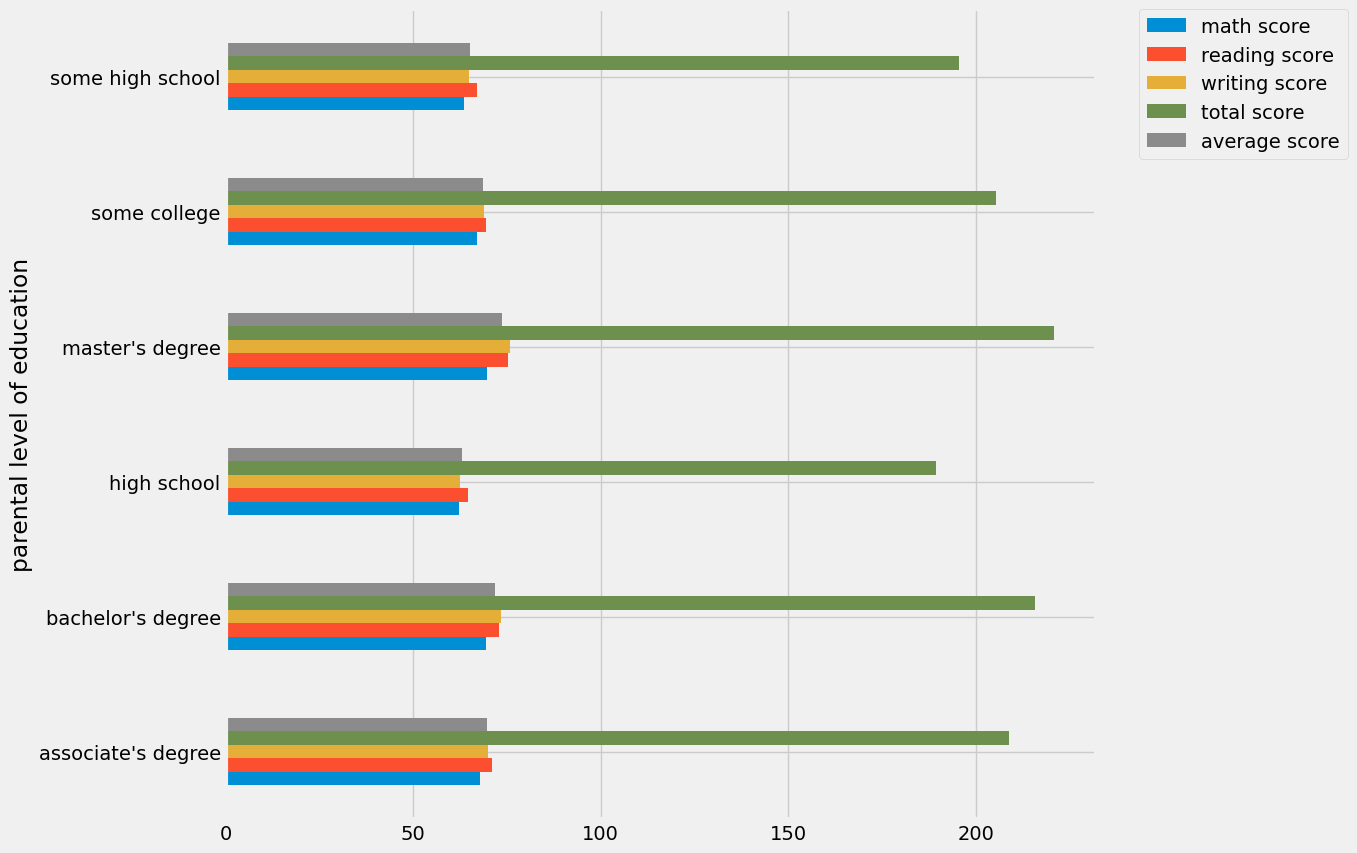

In [42]:
df.groupby('parental level of education').agg('mean', numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Students performance vs Types of lunch

C:\Users\msali\AppData\Local\Temp\ipykernel_22532\1574873987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


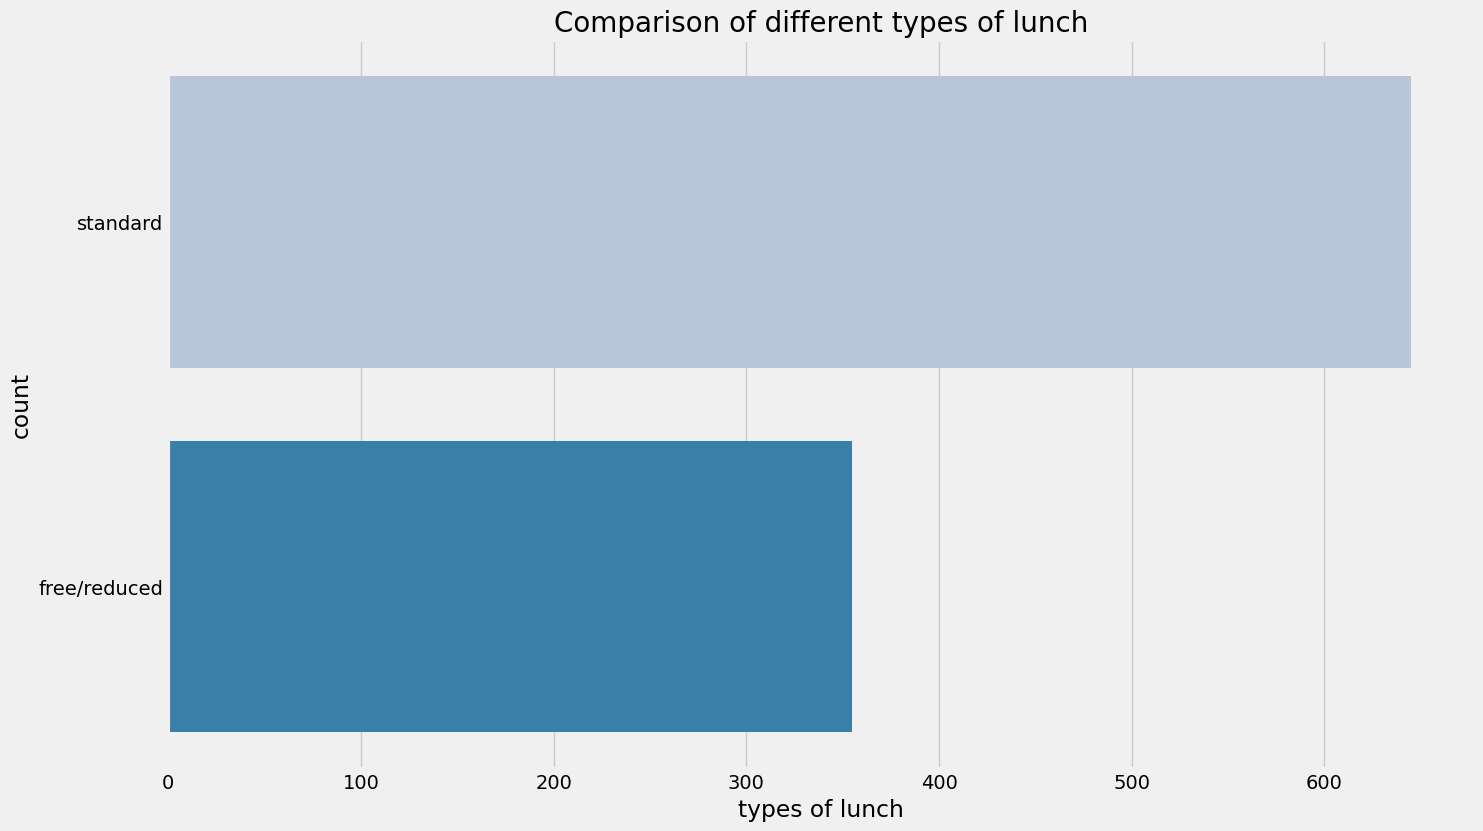

In [46]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Students performance vs Test preparation course

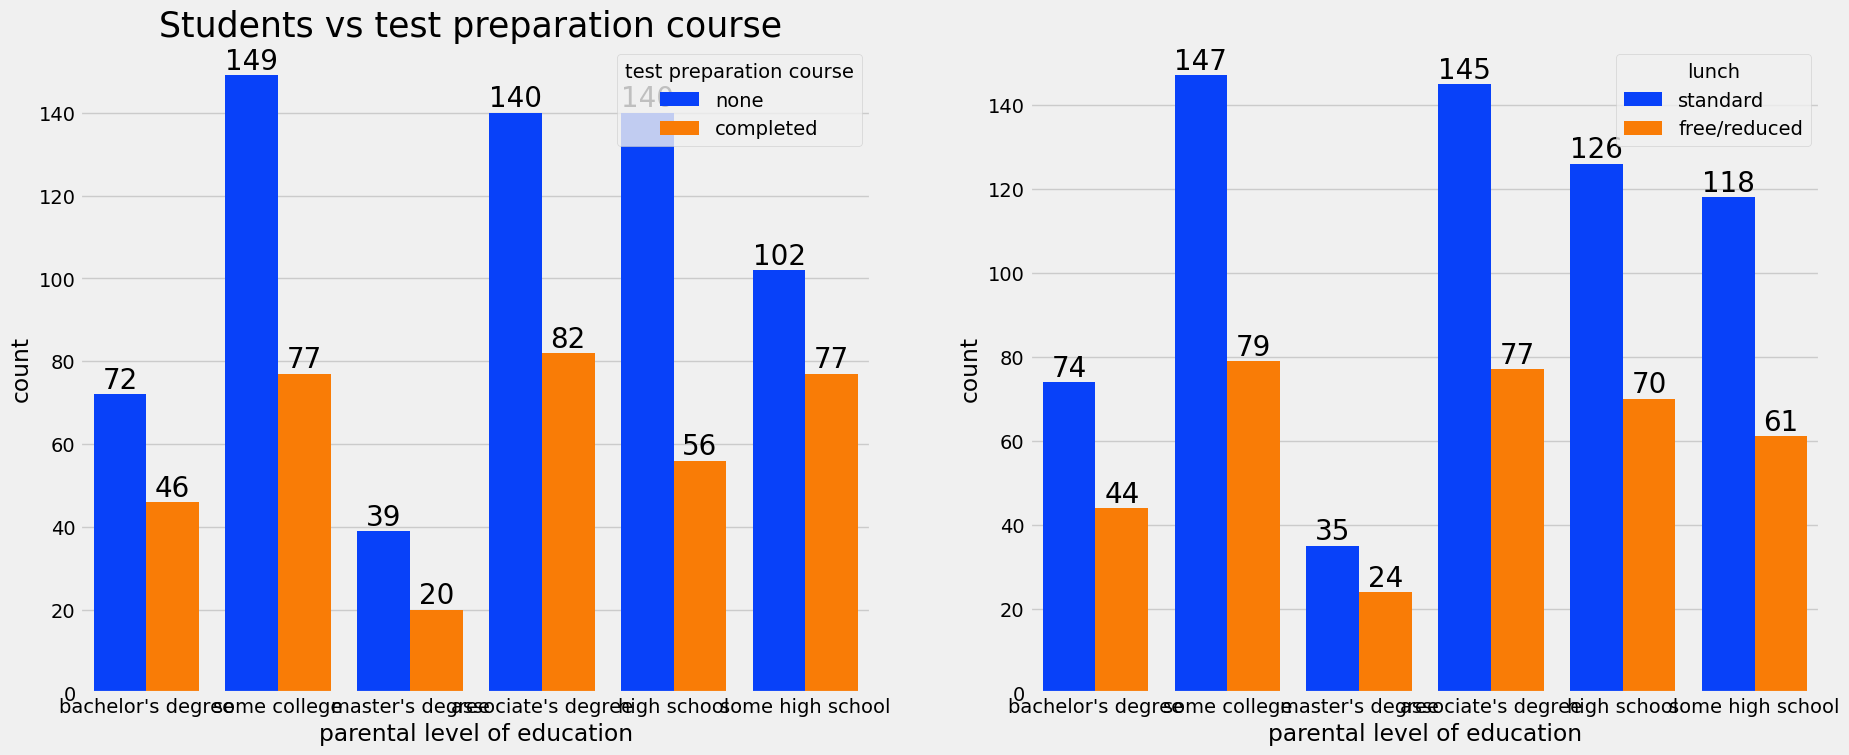

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing score'>

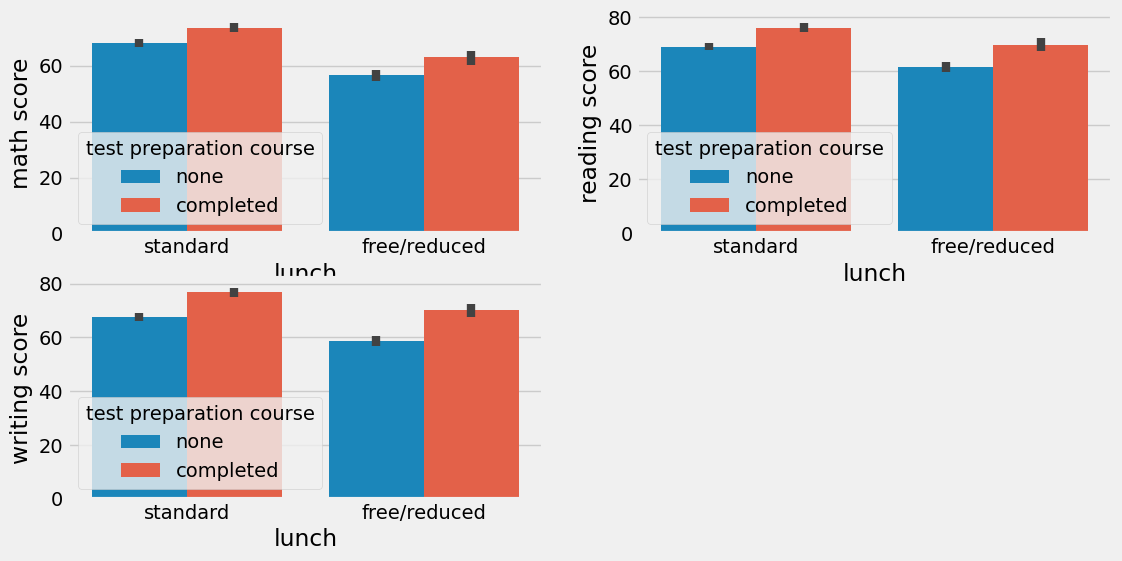

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

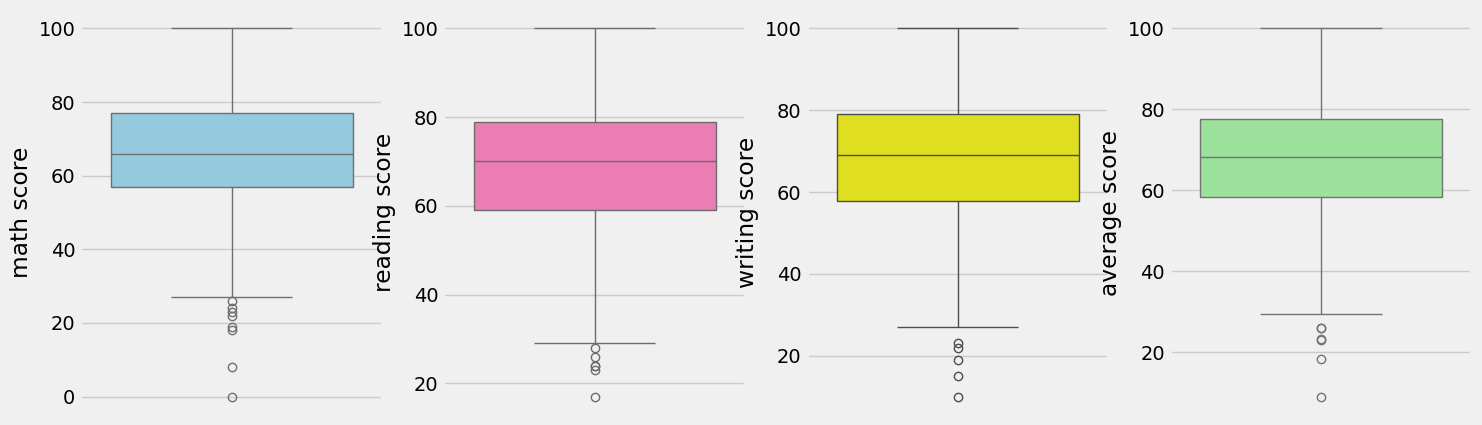

In [50]:
# outliers

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

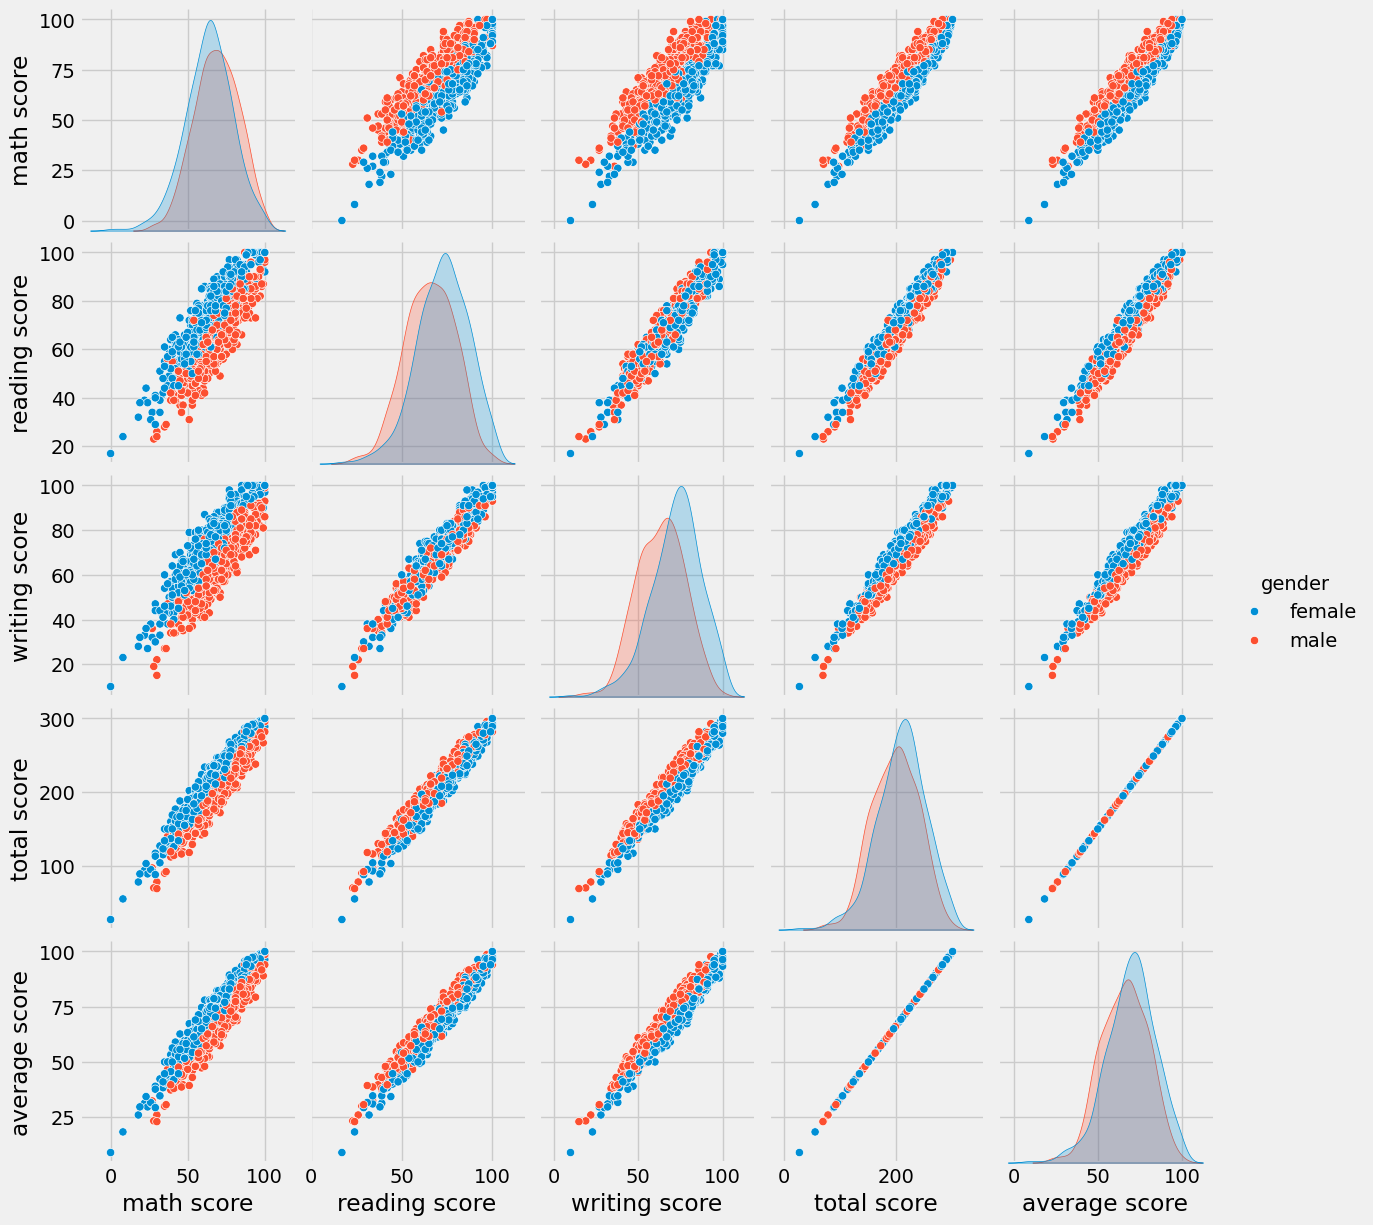

In [51]:
sns.pairplot(df,hue = 'gender')
plt.show()